<a href="https://colab.research.google.com/github/saritmaitra/Credit-rating-bank/blob/master/Credit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
install.packages('rpart')

package 'rpart' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Sarit\AppData\Local\Temp\RtmpM1UrMh\downloaded_packages


In [0]:
library(knitr)
library(dplyr)
library(tidyr)
library(reshape2)
library(RColorBrewer)
library(ggplot2)
library(caret)
library(glmnet)
library(boot)

Loading required package: Matrix

Attaching package: 'Matrix'

The following object is masked from 'package:tidyr':

    expand

Loading required package: foreach
Loaded glmnet 2.0-16


Attaching package: 'boot'

The following object is masked from 'package:lattice':

    melanoma



In [0]:
install.packages('verification')

package 'verification' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Sarit\AppData\Local\Temp\RtmpM1UrMh\downloaded_packages


In [0]:
library(verification)

Warning message:
"package 'verification' was built under R version 3.6.1"Loading required package: fields
Warning message:
"package 'fields' was built under R version 3.6.1"Loading required package: spam
Warning message:
"package 'spam' was built under R version 3.6.1"Loading required package: dotCall64
Warning message:
"package 'dotCall64' was built under R version 3.6.1"Loading required package: grid
Spam version 2.2-2 (2019-03-07) is loaded.
Type 'help( Spam)' or 'demo( spam)' for a short introduction 
and overview of this package.
Help for individual functions is also obtained by adding the
suffix '.spam' to the function name, e.g. 'help( chol.spam)'.

Attaching package: 'spam'

The following object is masked from 'package:Matrix':

    det

The following objects are masked from 'package:base':

    backsolve, forwardsolve

Loading required package: maps
See https://github.com/NCAR/Fields for
 an extensive vignette, other supplements and source code 
Loading required package: CircS

In [0]:
df = read.csv("credit.csv")


### Data mining

In [0]:
str(df)

'data.frame':	1000 obs. of  17 variables:
 $ checking_balance    : Factor w/ 4 levels "< 0 DM","> 200 DM",..: 1 3 4 1 1 4 4 3 4 3 ...
 $ months_loan_duration: int  6 48 12 42 24 36 24 36 12 30 ...
 $ credit_history      : Factor w/ 5 levels "critical","good",..: 1 2 1 2 4 2 2 2 2 1 ...
 $ purpose             : Factor w/ 6 levels "business","car",..: 5 5 4 5 2 4 5 2 5 2 ...
 $ amount              : int  1169 5951 2096 7882 4870 9055 2835 6948 3059 5234 ...
 $ savings_balance     : Factor w/ 5 levels "< 100 DM","> 1000 DM",..: 5 1 1 1 1 5 4 1 2 1 ...
 $ employment_duration : Factor w/ 5 levels "< 1 year","> 7 years",..: 2 3 4 4 3 3 2 3 4 5 ...
 $ percent_of_income   : int  4 2 2 2 3 2 3 2 2 4 ...
 $ years_at_residence  : int  4 2 3 4 4 4 4 2 4 2 ...
 $ age                 : int  67 22 49 45 53 35 53 35 61 28 ...
 $ other_credit        : Factor w/ 3 levels "bank","none",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ housing             : Factor w/ 3 levels "other","own",..: 2 2 2 1 1 1 2 3 2 2 ...
 $ exi

 - Above output displays quite a few factor variables e.g.checking_variables, credit_history, purpose etc., these are
   categorical variables

In [0]:
require(dplyr)

In [0]:
install.packages('Hmisc')

package 'Hmisc' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Sarit\AppData\Local\Temp\RtmpM1UrMh\downloaded_packages


In [0]:
library('Hmisc')

Warning message:
"package 'Hmisc' was built under R version 3.6.1"Loading required package: survival

Attaching package: 'survival'

The following object is masked from 'package:boot':

    aml

The following object is masked from 'package:caret':

    cluster

Loading required package: Formula

Attaching package: 'Hmisc'

The following object is masked from 'package:fields':

    describe

The following objects are masked from 'package:dplyr':

    src, summarize

The following objects are masked from 'package:base':

    format.pval, units



In [0]:
install.packages('GGally')

package 'GGally' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Sarit\AppData\Local\Temp\RtmpM1UrMh\downloaded_packages


In [0]:
library('GGally')

Warning message:
"package 'GGally' was built under R version 3.6.1"Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2

Attaching package: 'GGally'

The following object is masked from 'package:dplyr':

    nasa



In [0]:
head(df)

checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes
unknown,36,good,education,9055,unknown,1 - 4 years,2,4,35,none,other,1,unskilled,2,yes,no


#### Data Structure
There are 17 variables- 

 1  checking_balance	
 2  months_loan_duration	
 3  credit_history	
 4  purpose	
 5  amount	
 6  savings_balance	
 7  employment_duration	
 8  percent_of_income	
 9  years_at_residence	
 10 age	
 11 other_credit	
 12 housing	
 13 existing_loans_count	
 14 job	
 15 dependents	
 15 phone	
 17 default

Warning message in ggcorr(df, label = TRUE):
"data in column(s) 'checking_balance', 'credit_history', 'purpose', 'savings_balance', 'employment_duration', 'other_credit', 'housing', 'job', 'phone', 'default' are not numeric and were ignored"

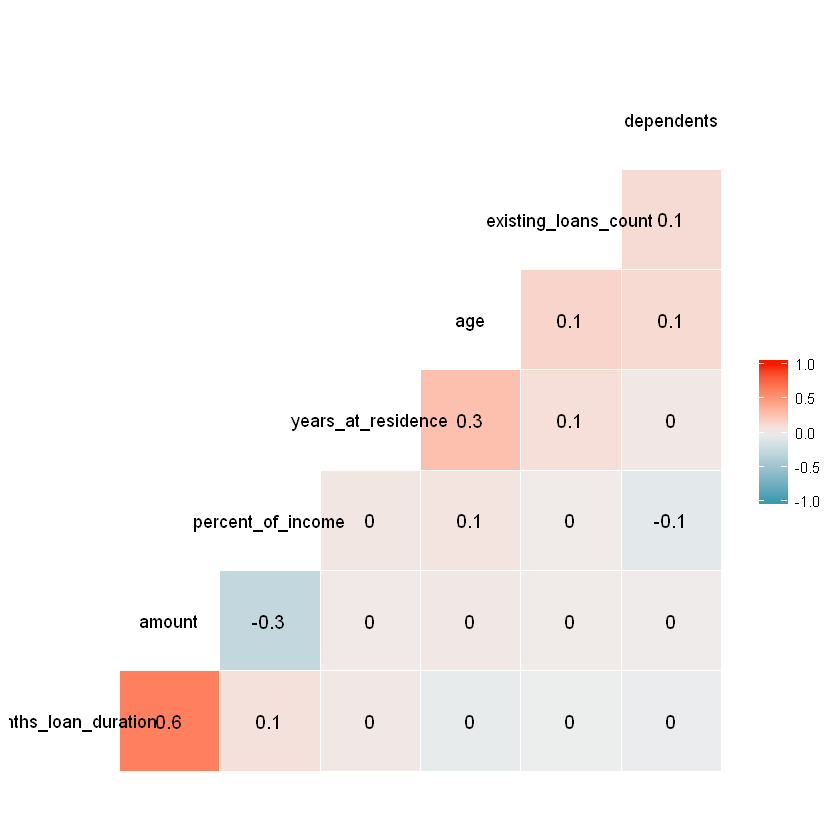

In [0]:
ggcorr(df, label = TRUE)

 - age over years_at_residence, correlation coefficient of these two variables is 0.3 signifies moderate correlation
 - anount over percent_of_income have moderate negative correlation (-0.3)
 - amount and months_loan_duration has significant positive correlation (0.6)
 
The applicant’s checking, savings account balance and credit history are categorical variables in the dataset. Let’s take a look at the output of these loan features that seem likely to predict a default. 

In [0]:
table(df$checking_balance)


    < 0 DM   > 200 DM 1 - 200 DM    unknown 
       274         63        269        394 

In [0]:
table(df$savings_balance)


     < 100 DM     > 1000 DM  100 - 500 DM 500 - 1000 DM       unknown 
          603            48           103            63           183 

In [0]:
table(df$credit_history)


 critical      good   perfect      poor very good 
      293       530        40        88        49 

 - The checking, savings account balance and credit are always important predictors from loan default perspective. The currency
   is recorded in Deutsche Marks (DM). Some of the loan’s features are numeric, such as its duration and the amount of credit      requested.

In [0]:
summary(df)

   checking_balance months_loan_duration   credit_history
 < 0 DM    :274     Min.   : 4.0         critical :293   
 > 200 DM  : 63     1st Qu.:12.0         good     :530   
 1 - 200 DM:269     Median :18.0         perfect  : 40   
 unknown   :394     Mean   :20.9         poor     : 88   
                    3rd Qu.:24.0         very good: 49   
                    Max.   :72.0                         
                 purpose        amount           savings_balance
 business            : 97   Min.   :  250   < 100 DM     :603   
 car                 :337   1st Qu.: 1366   > 1000 DM    : 48   
 car0                : 12   Median : 2320   100 - 500 DM :103   
 education           : 59   Mean   : 3271   500 - 1000 DM: 63   
 furniture/appliances:473   3rd Qu.: 3972   unknown      :183   
 renovations         : 22   Max.   :18424                       
  employment_duration percent_of_income years_at_residence      age       
 < 1 year   :172      Min.   :1.000     Min.   :1.000      Min. 

#### Exploratory Data Analysis of Continuous Data
 - The amount ranged from 250 DM to 18,424 DM (this is loan amount) across months_loan_duration of 4 to 72 months with a median
   duration of 18 months and an amount of 2,320 DM.
 - From purpose, seems most of loan application towards car (337) and furniture/appliances (473).
 - From default, there are quite a number of default (300).
 - months_loan_duration, amount and age have primary impact on default. 

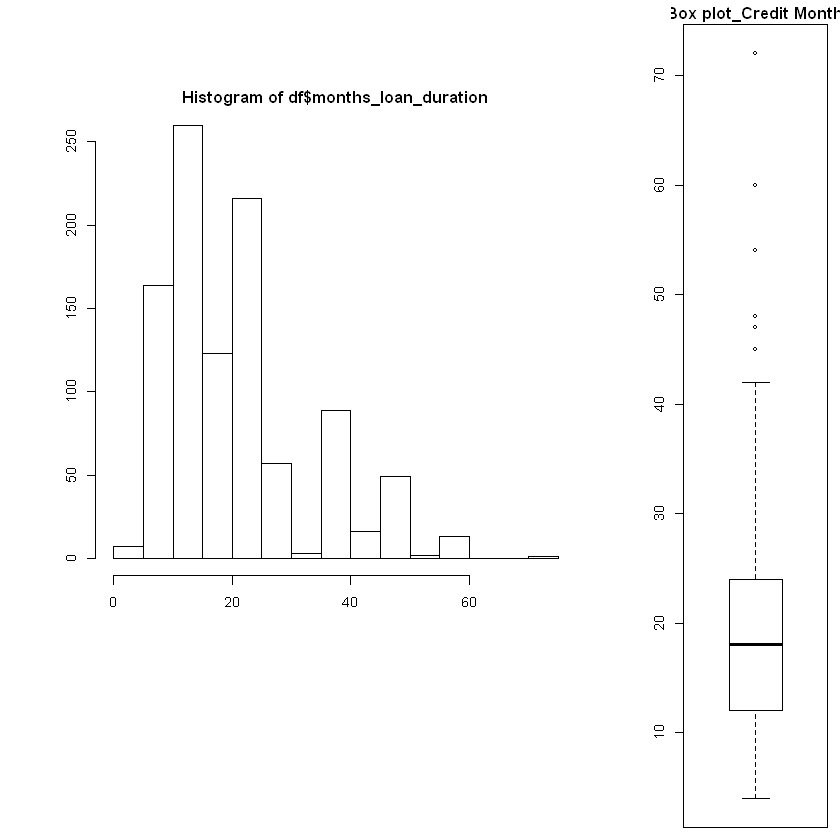

In [0]:
par(cex=0.7, mai=c(0.1,0.1,0.2,0.1))
# define area for the histogram
par(fig=c(0.1,0.7,0.3,0.9))
hist(df$months_loan_duration, xlab = "Duration Month")
# define area for the boxplot
par(fig=c(0.8,1,0,1), new=TRUE)
boxplot(df$months_loan_duration, main = "Box plot_Credit Month")

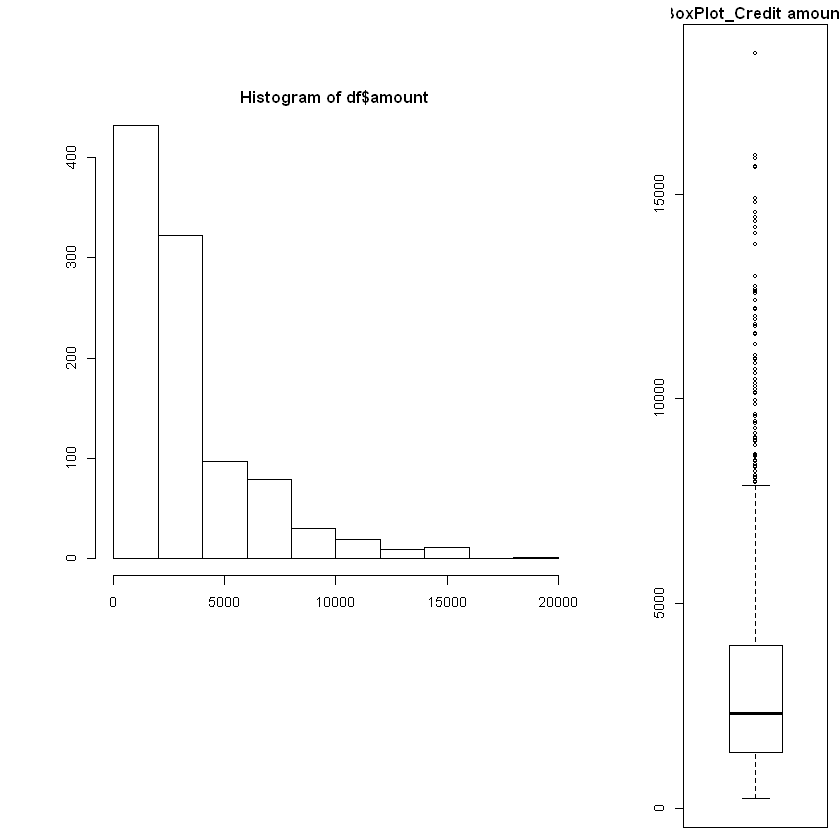

In [0]:
par(cex=0.7, mai=c(0.1,0.1,0.2,0.1))
# define area for the histogram
par(fig=c(0.1,0.7,0.3,0.9))
hist(df$amount)
# define area for the boxplot
par(fig=c(0.8,1,0,1), new=TRUE)
boxplot(df$amount, main = "BoxPlot_Credit amount")


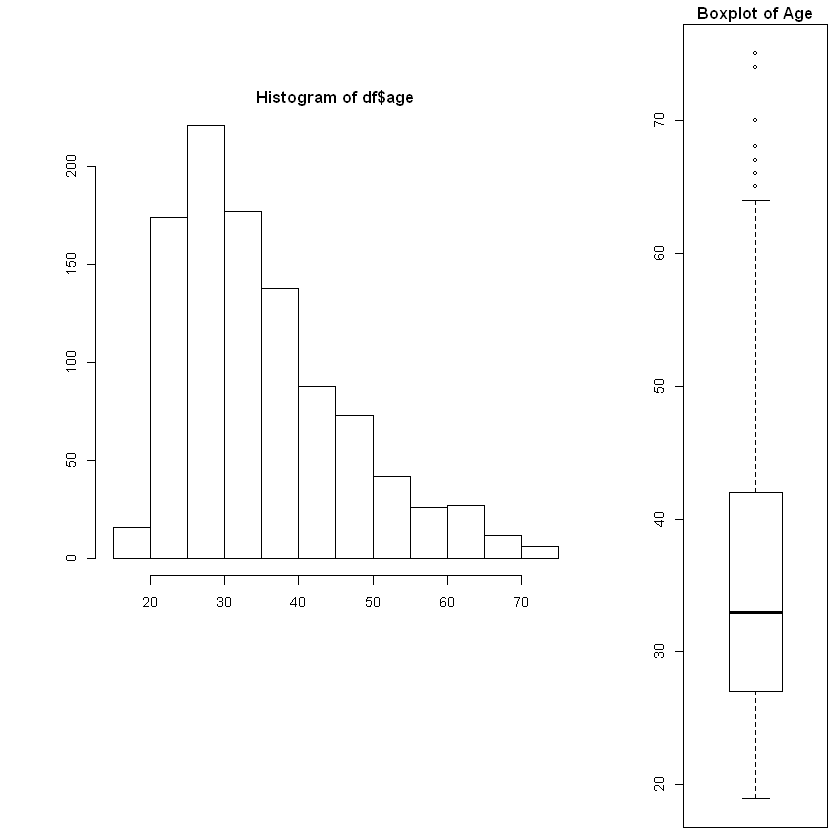

In [0]:
par(cex=0.7, mai=c(0.1,0.1,0.2,0.1))

par(fig=c(0.1,0.7,0.3,0.9))
hist(df$age)
# define area for the boxplot
par(fig=c(0.8,1,0,1), new=TRUE)
boxplot(df$age, main="Boxplot of Age")

 - All the three variables show marked positive skewness. Its even more clear looking at box plots.

#### Exploratory Data Analysis of Categorical Data

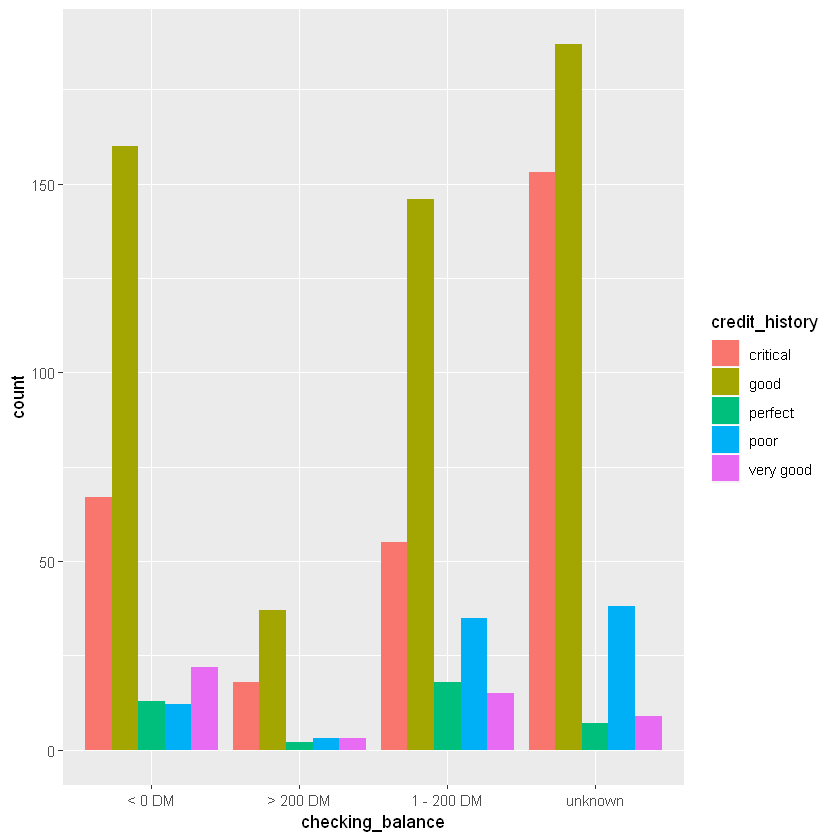

In [0]:
ggplot(df, aes(checking_balance, ..count..)) + 
  geom_bar(aes(fill = credit_history), position = "dodge") 

 - For checking_balance we see that, the current status of the checking balance matters as the frequency of the crtical credit
   history is a lot in unknown category.

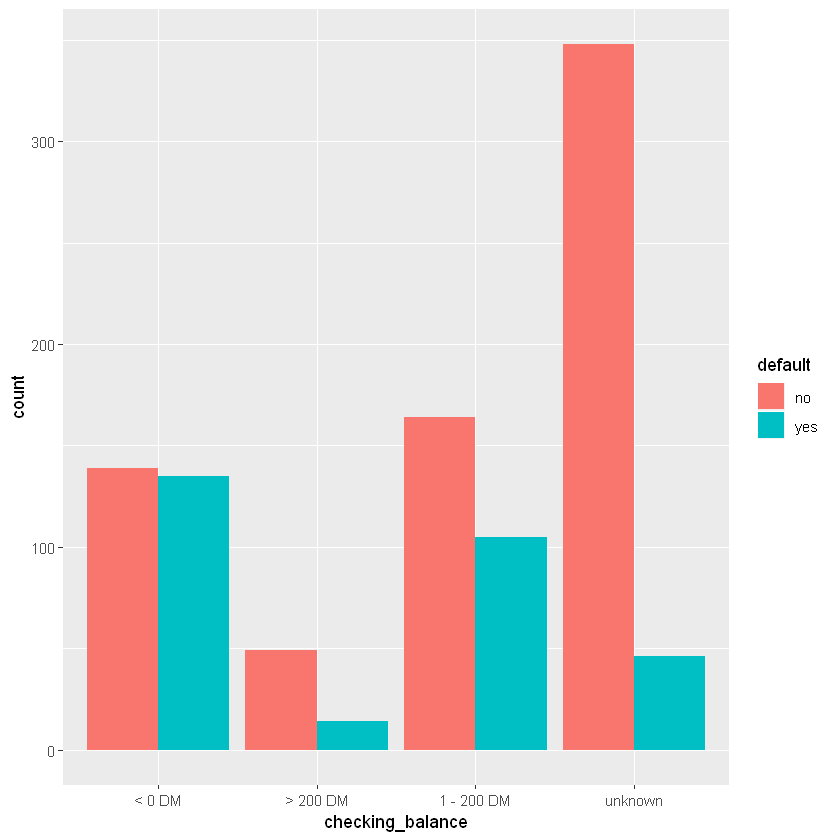

In [0]:
ggplot(df, aes(checking_balance, ..count..)) + 
  geom_bar(aes(fill = default), position = "dodge") 

 - Here we see that <0 checking_balance has maximum number of deualt.

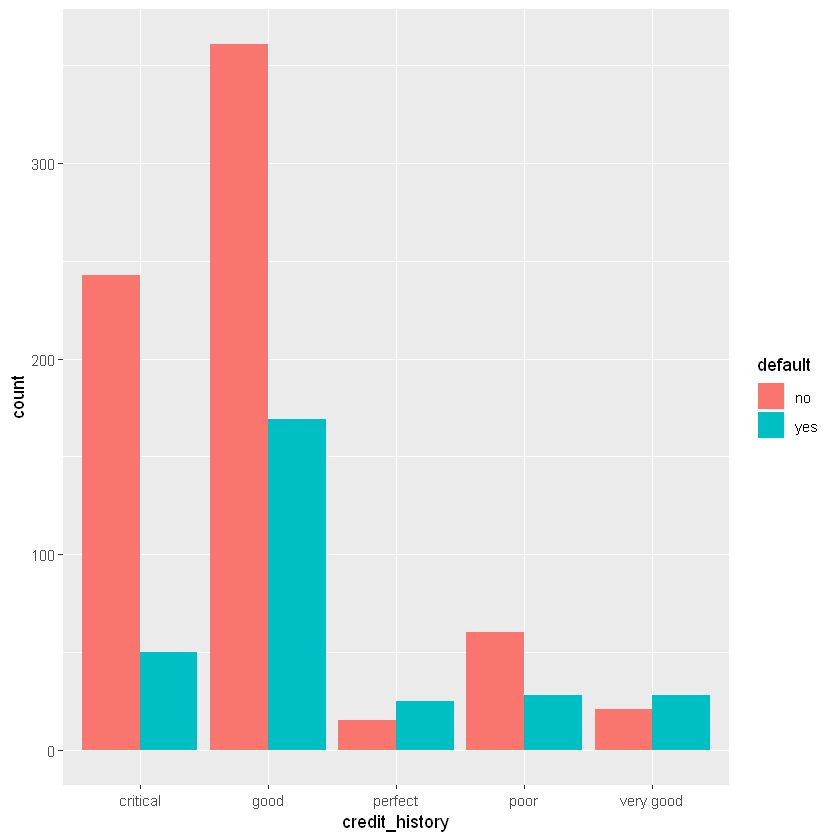

In [0]:
ggplot(df, aes(credit_history, ..count..)) + 
  geom_bar(aes(fill = default), position = "dodge")

 - For credit_history, we observe that proportion of the default varies significantly, for categories critical and poor, we see
   the number of default records are greater.

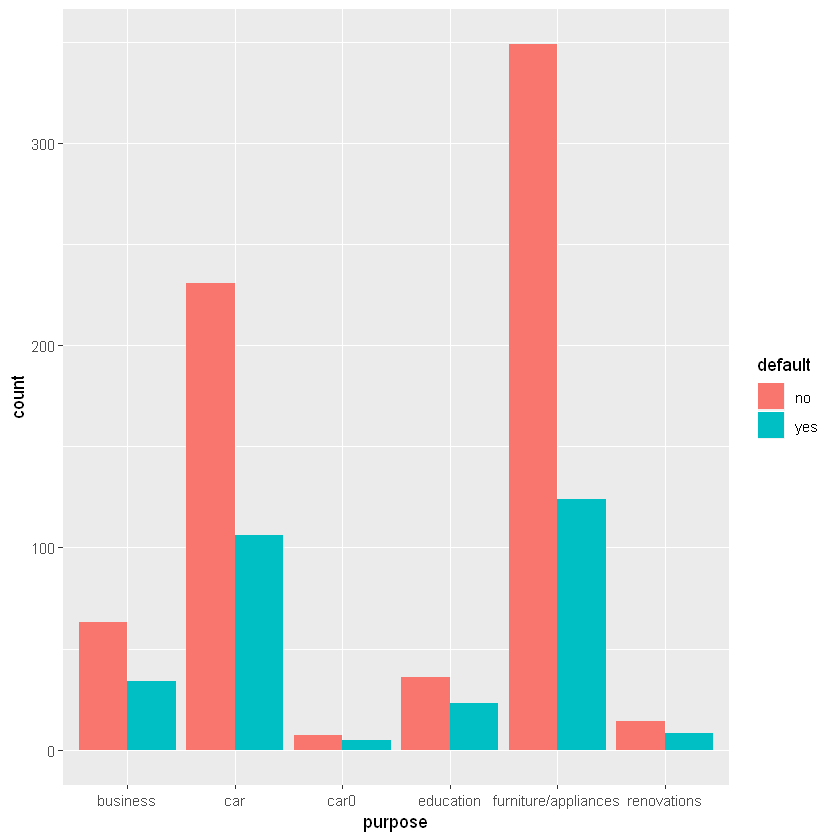

In [0]:
ggplot(df, aes(purpose, ..count..)) + 
  geom_bar(aes(fill = default), position = "dodge") 

 - We already have seen that many are buying car and furniture/appliances. We see here, that the proportion of default varies.

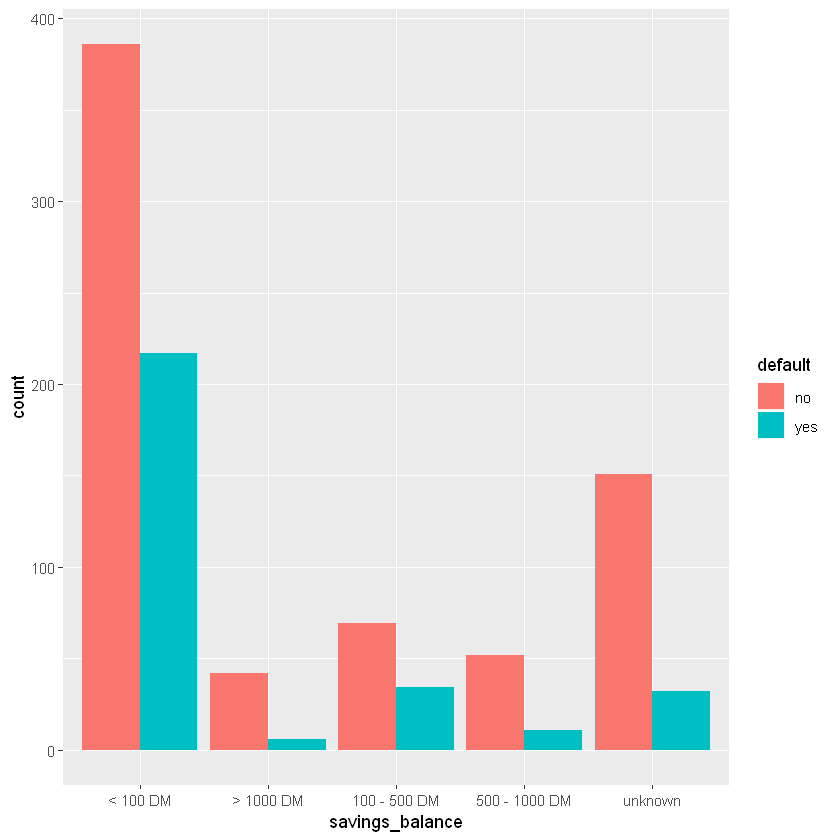

In [0]:
ggplot(df, aes(savings_balance, ..count..)) + 
  geom_bar(aes(fill = default), position = "dodge") 

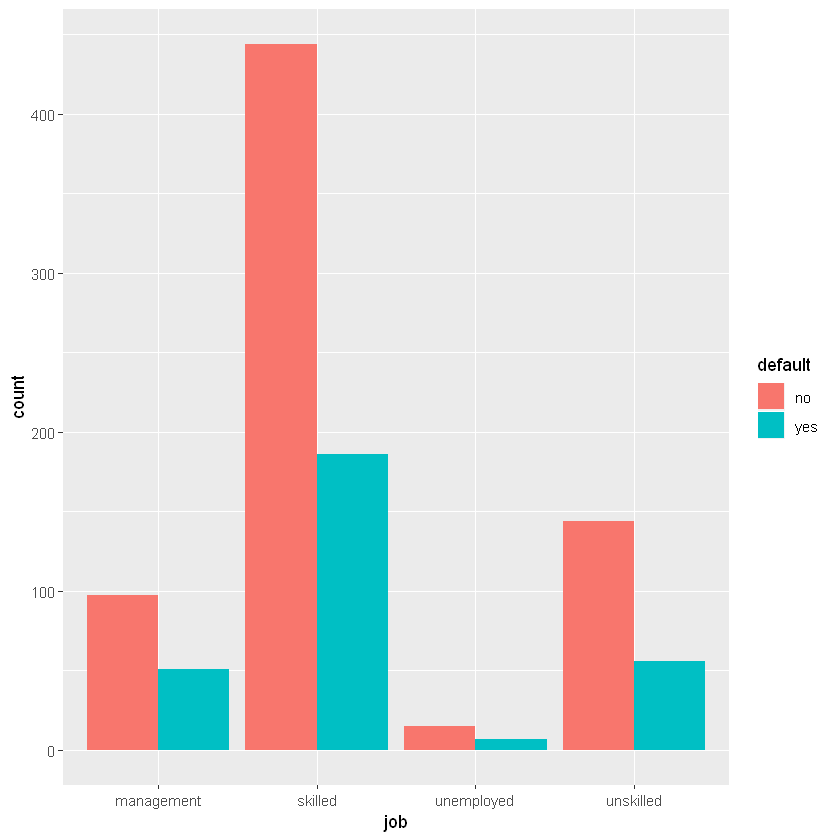

In [0]:
ggplot(df, aes(job, ..count..)) + 
  geom_bar(aes(fill = default), position = "dodge") 

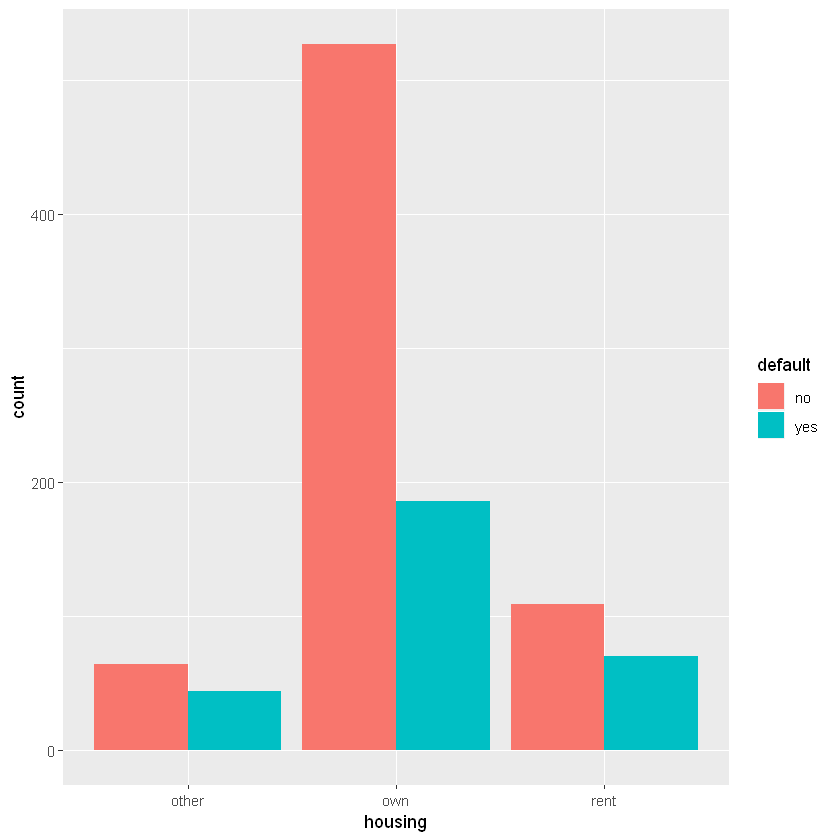

In [0]:
ggplot(df, aes(housing, ..count..)) + 
  geom_bar(aes(fill = default), position = "dodge") 

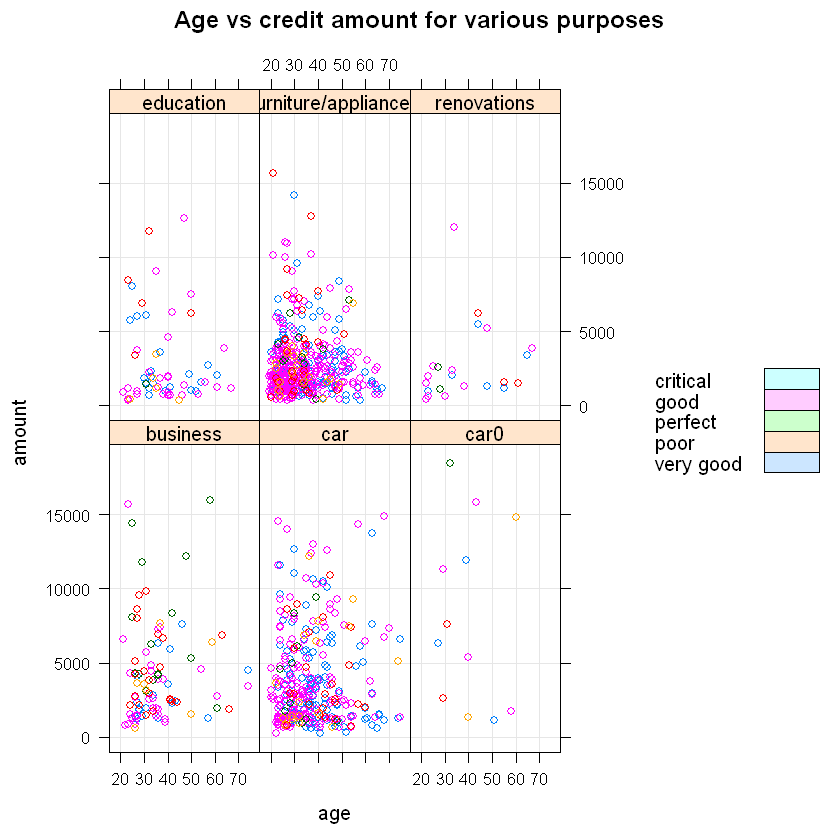

In [0]:
library(lattice)
xyplot(amount ~ age|purpose, df, grid = TRUE, 
       group = credit_history,auto.key = list(points = FALSE, rectangles = TRUE, 
                                             space = "right"),main="Age vs credit amount for various purposes")



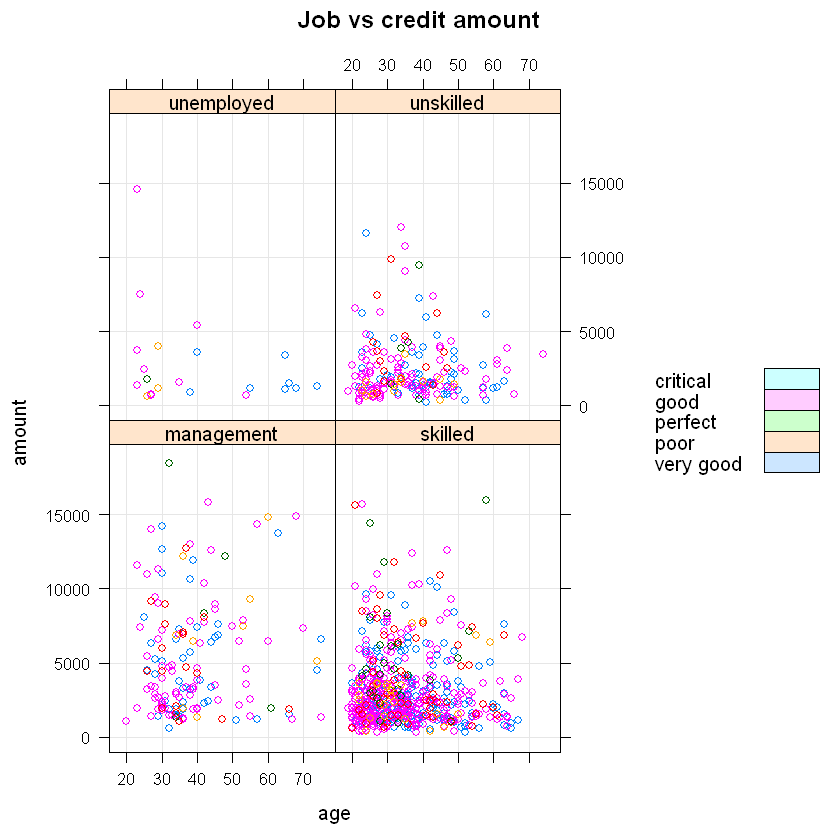

In [0]:
xyplot(amount ~ age|job, df, grid = TRUE, 
       group = credit_history,auto.key = list(points = FALSE, rectangles = TRUE, space = "right"),
       main="Job vs credit amount")

##### Split data into train & test set
Out of the 1000 observations, 900 were permuated and stored in a train_sample object. This object contains a vector of 900 elements which numbers are randomized out of the possibilities of 1000 numbers. I have sued 90/10 split, where 900 store in 'train' as the train dataset. The remaining 100 observations stre in a 'test' as a test dataset.

In [0]:
set.seed(123)
train_sample = sample(1000, 900)

In [0]:
glimpse(train_sample)

 int [1:900] 415 463 179 526 195 938 818 118 299 229 ...


 - As expected, the resulting train_sample object is a vector of 900 random integers

In [0]:
train = df[train_sample, ]
test  = df[-train_sample, ]

In [0]:
prop.table(table(train$default))


       no       yes 
0.7055556 0.2944444 

In [0]:
prop.table(table(test$default))


  no  yes 
0.65 0.35 

This appears a fairly even split, so we can now build our decision tree. 
### Training a model on train set

In [0]:
install.packages('C50')

package 'C50' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Sarit\AppData\Local\Temp\RtmpM1UrMh\downloaded_packages


In [0]:
library('C50')

Warning message:
"package 'C50' was built under R version 3.6.1"

### Classification tree model
Pre-pruning a decision tree before letting the tree grow to an optimal size could miss important patterns. The purpose of a decision tree is to learn the data in depth and pre-pruning would decrease those chances. I have used post-prune to allow the decision tree to maximize the depth of the decision tree. This will allow the algorithm to have all of the important data.

In [0]:
DT = C5.0(default ~ checking_balance + months_loan_duration+credit_history+
                              purpose+amount+savings_balance+employment_duration+percent_of_income+
                              years_at_residence+age+other_credit+housing+existing_loans_count+job+dependents+phone, 
           data = train)
# View the forest results.
print(DT) 


Call:
C5.0.formula(formula = default ~ checking_balance + months_loan_duration
 + percent_of_income + years_at_residence + age + other_credit + housing
 + existing_loans_count + job + dependents + phone, data = train)

Classification Tree
Number of samples: 900 
Number of predictors: 16 

Tree size: 69 

Non-standard options: attempt to group attributes



In [0]:
summary(DT)


Call:
C5.0.formula(formula = default ~ checking_balance + months_loan_duration
 + percent_of_income + years_at_residence + age + other_credit + housing
 + existing_loans_count + job + dependents + phone, data = train)


C5.0 [Release 2.07 GPL Edition]  	Tue Aug 06 12:42:22 2019
-------------------------------

Class specified by attribute `outcome'

Read 900 cases (17 attributes) from undefined.data

Decision tree:

checking_balance in {> 200 DM,unknown}: no (412/54)
checking_balance in {< 0 DM,1 - 200 DM}:
:...credit_history in {perfect,very good}:
    :...housing = rent: yes (16/1)
    :   housing = other:
    :   :...employment_duration in {> 7 years,1 - 4 years,
    :   :   :                       4 - 7 years}: yes (10)
    :   :   employment_duration in {< 1 year,unemployed}:
    :   :   :...job in {management,unemployed,unskilled}: no (3)
    :   :       job = skilled: yes (1)
    :   housing = own:
    :   :...purpose in {business,education}: no (9/2)
    :       purpose in {ca

 - If the checking account balance is unknown or > 200 DM, then classify as “not likely to default.” Otherwise, if the checking 
   account balance is <0 or between 1 - 200 DM. And the credit history is perfect or very good, then classify as “likely to 
   default.”
 - The numbers in parentheses indicate the number of examples meeting the criteria for that decision, and the number
   incorrectly classified by the decision. For instance, on the first line, 412/54 indicates that of the 412 examples reaching    the decision, 54 were incorrectly classified as not likely to default. In other words, 54 applicants actually defaulted, in 
   spite of the model’s prediction to the contrary.

Sometimes a tree results in decisions that make little logical sense. For example, why would an applicant whose credit history is very good be likely to default, while those whose checking balance is unknown are not likely to default? Contradictory rules like this occur sometimes. They might reflect a real pattern in the data, or they may be a statistical anomaly. In either case, it is important to investigate such strange decisions to see whether the tree’s logic makes sense for business use.

##### Model performance 
The Errors output notes that the model correctly classified all but 99 of the 900 training instances for an error rate of 11%. A total of 10 actual no values were incorrectly classified as yes (false positives), while 89 yes values were misclassified as no (false negatives).

Decision trees are known for having a tendency to overfit the model to the training data. For this reason, the error rate reported on training data may be overly optimistic, and it is especially important to evaluate decision trees on a test data set.

In [0]:
library(gmodels)


Warning message:
"package 'gmodels' was built under R version 3.6.1"

In [0]:
pred = predict(DT, test)
CrossTable(test$default, pred,
             prop.chisq = FALSE, prop.c = FALSE, prop.r = FALSE,
             dnn = c('actual default', 'predicted default'))


 
   Cell Contents
|-------------------------|
|                       N |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  100 

 
               | predicted default 
actual default |        no |       yes | Row Total | 
---------------|-----------|-----------|-----------|
            no |        55 |        10 |        65 | 
               |     0.550 |     0.100 |           | 
---------------|-----------|-----------|-----------|
           yes |        20 |        15 |        35 | 
               |     0.200 |     0.150 |           | 
---------------|-----------|-----------|-----------|
  Column Total |        75 |        25 |       100 | 
---------------|-----------|-----------|-----------|

 


##### We have 55 TNs (True Negatives) and 15 TPs (True Positives) out of 100 rows.
#### Evaluation DT

In [0]:
confusionMatrix(pred, test$default, dnn = c("Predicted", "Actual"))

Confusion Matrix and Statistics

         Actual
Predicted no yes
      no  55  20
      yes 10  15
                                          
               Accuracy : 0.7             
                 95% CI : (0.6002, 0.7876)
    No Information Rate : 0.65            
    P-Value [Acc > NIR] : 0.1730          
                                          
                  Kappa : 0.2941          
                                          
 Mcnemar's Test P-Value : 0.1003          
                                          
            Sensitivity : 0.8462          
            Specificity : 0.4286          
         Pos Pred Value : 0.7333          
         Neg Pred Value : 0.6000          
             Prevalence : 0.6500          
         Detection Rate : 0.5500          
   Detection Prevalence : 0.7500          
      Balanced Accuracy : 0.6374          
                                          
       'Positive' Class : no              
                                        

The table indicates that out of 100 records in the test set 55 defaults were mis-classified i.e type II error with error rate 30%; also the model only correctly predicted 15 of the 35 actual loan defaults in the test data, (15/35= 42.85% (type1 error)). This type of error is a potentially very costly mistake, as the bank loses money on each default. We missed 10 defaults, which can be costly. 

### Decision Tree Includes Default and Age
This age gap shows major underlying issues of defaulting because of the age groups. This could be for a variety of reasons such as not having financial responsibility or stable employment. 

In [0]:
library(partykit)

Warning message:
"package 'partykit' was built under R version 3.6.1"Loading required package: libcoin
Warning message:
"package 'libcoin' was built under R version 3.6.1"Loading required package: mvtnorm


In [0]:
#credit_train = df[train_sample, ]
ctree_age = ctree(default ~ age, data = train )

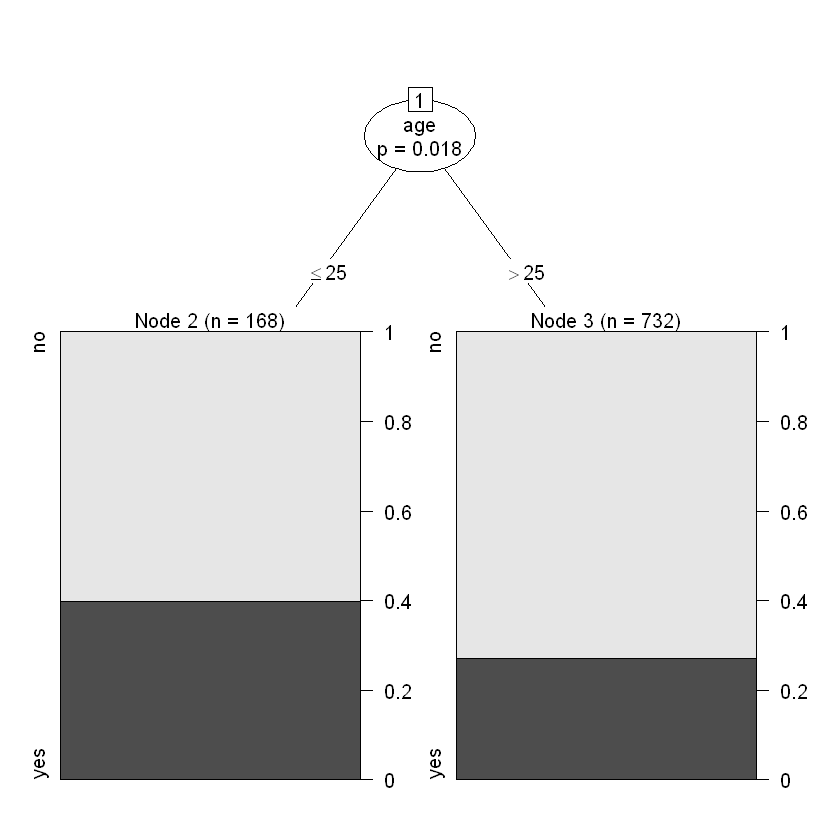

In [0]:
plot(ctree_age)

##### Total percentage breakdown:
 - Node 2 – 168 applicants * 0.39 = 66 defaults
 - Node 3 – 732 applicants * 0.25 = 183 defaults
 
Based on the decision tree, there are 168 applicants <25 years-old but account about 39% of defaults. However, there are 732 applicants >25 years-old and account for about 25% of this age category. 

#### Decision Tree Includes Employment Duration
If instability to keep a job is a factor, adding the employment_duration to the decision tree will show how the age groups ranks. 

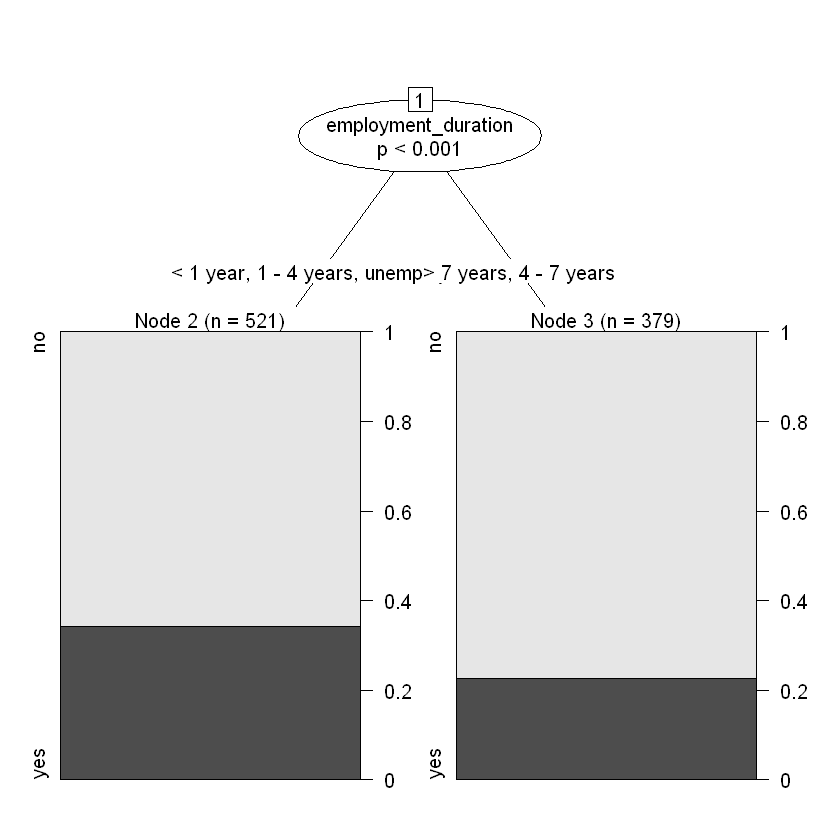

In [0]:
ctree_job = ctree(default ~ employment_duration, data = train )
plot(ctree_job)

As we can see, node 2 has an employment duration of less than a year and unknown shows a total of 521 applicants with 38% default. On node 3, there are a total of 379 applicants. Their employment duration is greater than 7 years, 4-7 years and 1-4 years with 22% default.

##### Total percentage breakdown

 - Node 2 – 521 applicants * 0.38 = 198 defaults
 - Node 3 – 379 applicants * 0.22 = 83 defaults

From the above analysis, there’s a larger default percentage with employment duration versus the age. Logically loss of employment is the biggest factor for payment default.

#### Decision Tree Includes Savings Balance
The biggest personal concern for me with a large loan such as a mortgage is to think of the worst.

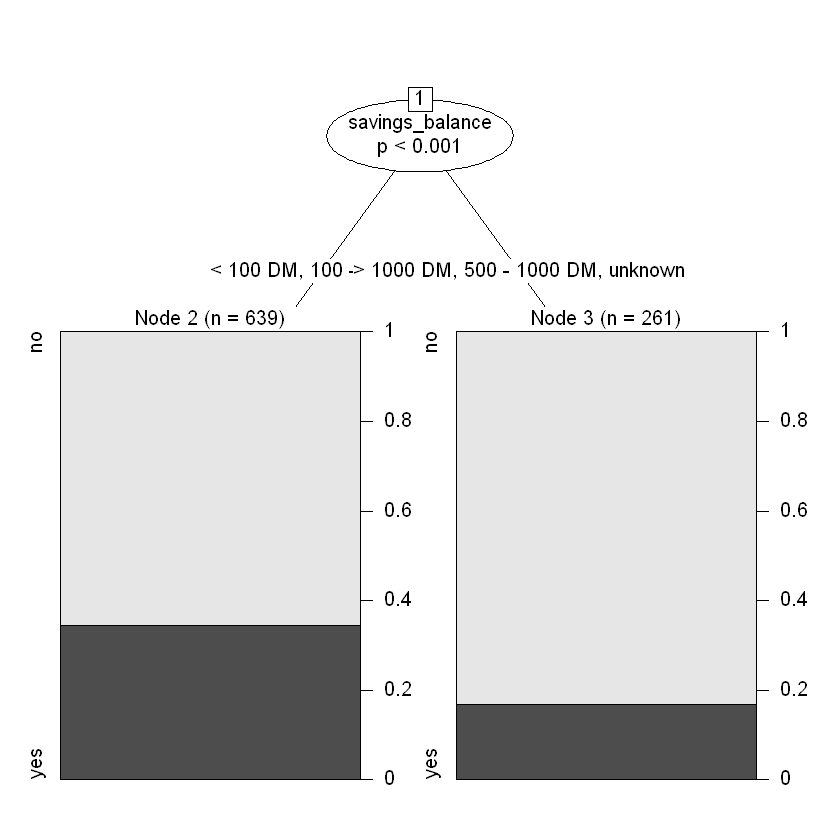

In [0]:
ctree_savings <- ctree(default ~ savings_balance, data = train )
plot(ctree_savings)

The above decision tree based on savings, this shows a great difference between having a large sum of savings saved up. There are two nodes broken up between > 100 upto < 1000 in savings. Node three is broken into less than 500 -1000 in savings.

#### Total percentage breakdown

 - Node 2 – 639 applicants * 0.38 defaults = 243 defaults
 - Node 3 – 261 applicants * 0.18 defaults = 47 defaults

### Decision Tree Includes Multiple Factors

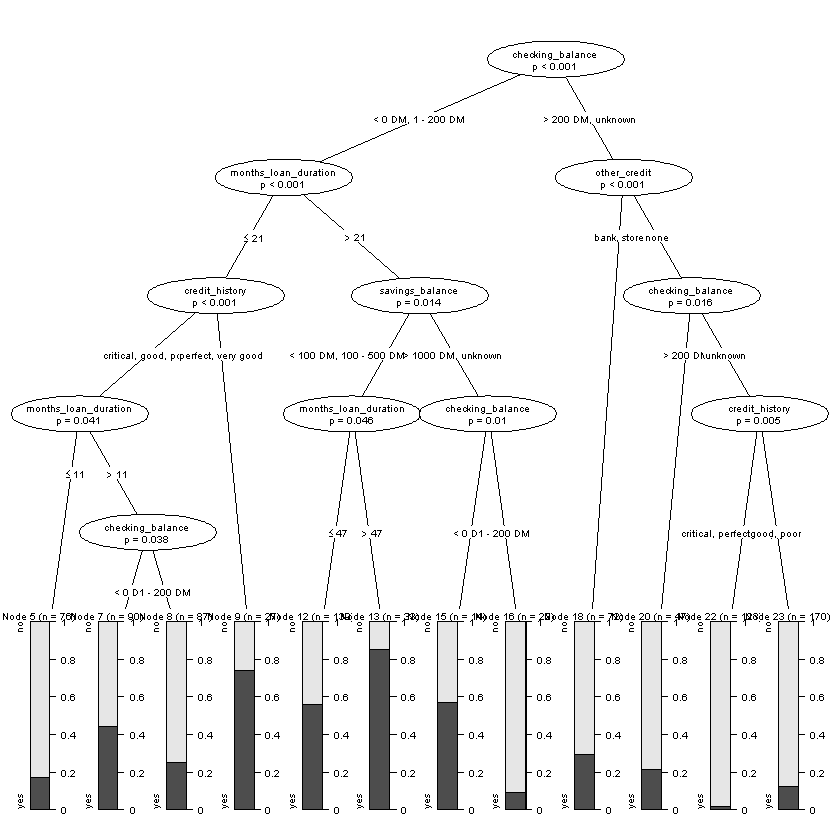

In [0]:
output_tree = ctree(default ~ checking_balance + other_credit + months_loan_duration + credit_history + 
                                         savings_balance, data = train)
plot(output_tree, gp = gpar(fontsize = 6),    
  inner_panel=node_inner,
  ip_args=list(id = FALSE)
  )

In [0]:
output_tree


Model formula:
default ~ checking_balance + other_credit + months_loan_duration + 
    credit_history + savings_balance

Fitted party:
[1] root
|   [2] checking_balance < 0 DM, 1 - 200 DM
|   |   [3] months_loan_duration <= 21
|   |   |   [4] credit_history in critical, good, poor
|   |   |   |   [5] months_loan_duration <= 11: no (n = 76, err = 17.1%)
|   |   |   |   [6] months_loan_duration > 11
|   |   |   |   |   [7] checking_balance < 0 DM: no (n = 90, err = 44.4%)
|   |   |   |   |   [8] checking_balance in 1 - 200 DM: no (n = 87, err = 25.3%)
|   |   |   [9] credit_history in perfect, very good: yes (n = 27, err = 25.9%)
|   |   [10] months_loan_duration > 21
|   |   |   [11] savings_balance < 100 DM, 100 - 500 DM, 500 - 1000 DM
|   |   |   |   [12] months_loan_duration <= 47: yes (n = 139, err = 43.9%)
|   |   |   |   [13] months_loan_duration > 47: yes (n = 33, err = 15.2%)
|   |   |   [14] savings_balance > 1000 DM, unknown
|   |   |   |   [15] checking_balance < 0 DM: yes (

As we can see in the above plot, the data is split into 23 nodes and 12 terminal nodes. 
### Improving model performance
The model’s error rate is too high for deployment in a real-time credit scoring application. 

## Adaptive Boosting
Trials over numerous datasets, large and small, show that 10-classifier boosting on average reduces the number of errors on test cases by about 25%.

In [0]:
DTboost = C5.0(train[-17], train$default, trials = 10)
DTboost


Call:
C5.0.default(x = train[-17], y = train$default, trials = 10)

Classification Tree
Number of samples: 900 
Number of predictors: 16 

Number of boosting iterations: 10 
Average tree size: 56.6 

Non-standard options: attempt to group attributes


 - Across the 10 iterations, the tree size shrunk. 
 - Some additional lines have been added, reflecting the changes.

In [0]:
summary(DTboost) # model’s performance on the training data:


Call:
C5.0.default(x = train[-17], y = train$default, trials = 10)


C5.0 [Release 2.07 GPL Edition]  	Tue Aug 06 16:08:41 2019
-------------------------------

Class specified by attribute `outcome'

Read 900 cases (17 attributes) from undefined.data

-----  Trial 0:  -----

Decision tree:

checking_balance in {> 200 DM,unknown}: no (412/54)
checking_balance in {< 0 DM,1 - 200 DM}:
:...credit_history in {perfect,very good}:
    :...housing = rent: yes (16/1)
    :   housing = other:
    :   :...employment_duration in {> 7 years,1 - 4 years,
    :   :   :                       4 - 7 years}: yes (10)
    :   :   employment_duration in {< 1 year,unemployed}:
    :   :   :...job in {management,unemployed,unskilled}: no (3)
    :   :       job = skilled: yes (1)
    :   housing = own:
    :   :...purpose in {business,education}: no (9/2)
    :       purpose in {car0,renovations}: yes (3)
    :       purpose = car:
    :       :...months_loan_duration <= 18: yes (5)
    :       :   months_

##### The classifier made 13 mistakes on 900 training sample with 1.4% error rate. This is quite an improvement over the 11.8% training error rate before adding boosting in train set. Let's see if it shows similar improvement on the test data. 

In [0]:
DTboostpred = predict(DTboost, test)
CrossTable(test$default, DTboostpred,
           prop.chisq = FALSE, prop.r = FALSE, prop.c = FALSE,
           dnn = c('actual default', 'predicted default'))


 
   Cell Contents
|-------------------------|
|                       N |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  100 

 
               | predicted default 
actual default |        no |       yes | Row Total | 
---------------|-----------|-----------|-----------|
            no |        52 |        13 |        65 | 
               |     0.520 |     0.130 |           | 
---------------|-----------|-----------|-----------|
           yes |        17 |        18 |        35 | 
               |     0.170 |     0.180 |           | 
---------------|-----------|-----------|-----------|
  Column Total |        69 |        31 |       100 | 
---------------|-----------|-----------|-----------|

 


#### Evaluation Adaptive Boost

In [0]:
confusionMatrix(DTboostpred, test$default)

Confusion Matrix and Statistics

          Reference
Prediction no yes
       no  52  17
       yes 13  18
                                          
               Accuracy : 0.7             
                 95% CI : (0.6002, 0.7876)
    No Information Rate : 0.65            
    P-Value [Acc > NIR] : 0.1730          
                                          
                  Kappa : 0.3228          
                                          
 Mcnemar's Test P-Value : 0.5839          
                                          
            Sensitivity : 0.8000          
            Specificity : 0.5143          
         Pos Pred Value : 0.7536          
         Neg Pred Value : 0.5806          
             Prevalence : 0.6500          
         Detection Rate : 0.5200          
   Detection Prevalence : 0.6900          
      Balanced Accuracy : 0.6571          
                                          
       'Positive' Class : no              
                                 

 - Here, the total error rate on test data remain similar (30% typeII error) like default DT. On the other hand, the model is
   still not doing well at predicting defaults, predicting only 18/35 = 51.43% correctly. Though predictive power of model has
   imporved but not signifiant. As such, boosting the model was not that useful. The overall results are similar to our
   original/default model. The lack of signifiant improvement may be a function of our relatively small training data set, or
   it may just be a very difficult problem to solve.
   
#### Rule based DT

In [0]:
DTrule = C5.0(train[-17], train$default, rules = TRUE)
DTrule


Call:
C5.0.default(x = train[-17], y = train$default, rules = TRUE)

Rule-Based Model
Number of samples: 900 
Number of predictors: 16 

Number of Rules: 32 

Non-standard options: attempt to group attributes


In [0]:
summary(DTrule)


Call:
C5.0.default(x = train[-17], y = train$default, rules = TRUE)


C5.0 [Release 2.07 GPL Edition]  	Tue Aug 06 14:59:07 2019
-------------------------------

Class specified by attribute `outcome'

Read 900 cases (17 attributes) from undefined.data

Rules:

Rule 1: (35, lift 1.4)
	credit_history in {critical, good, poor}
	savings_balance in {< 100 DM, 100 - 500 DM, 500 - 1000 DM}
	employment_duration = 4 - 7 years
	job in {management, unskilled}
	->  class no  [0.973]

Rule 2: (22, lift 1.4)
	checking_balance in {< 0 DM, 1 - 200 DM}
	credit_history in {critical, good, poor}
	amount <= 6110
	savings_balance in {> 1000 DM, unknown}
	phone = yes
	->  class no  [0.958]

Rule 3: (17, lift 1.3)
	months_loan_duration > 15
	months_loan_duration <= 47
	savings_balance in {100 - 500 DM, 500 - 1000 DM}
	employment_duration = 4 - 7 years
	->  class no  [0.947]

Rule 4: (16, lift 1.3)
	months_loan_duration <= 15
	credit_history = good
	purpose = car
	employment_duration in {< 1 year, 1 - 4 yea

We can see that 32 sets of rules are created with top most rule as 
 - credit_history in {critical, good, poor}
 - savings_balance in {< 100 DM, 100 - 500 DM, 500 - 1000 DM}
 - employment_duration = 4 - 7 years
 - job in {management, unskilled}
 
But the error rate has gone upto 14%. Let's see the model performance on test data.

In [0]:
DTrulepred = predict(DTrule, test)
CrossTable(test$default, DTrulepred,
           prop.chisq = FALSE, prop.r = FALSE, prop.c = FALSE,
           dnn = c('actual default', 'predicted default'))


 
   Cell Contents
|-------------------------|
|                       N |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  100 

 
               | predicted default 
actual default |        no |       yes | Row Total | 
---------------|-----------|-----------|-----------|
            no |        57 |         8 |        65 | 
               |     0.570 |     0.080 |           | 
---------------|-----------|-----------|-----------|
           yes |        19 |        16 |        35 | 
               |     0.190 |     0.160 |           | 
---------------|-----------|-----------|-----------|
  Column Total |        76 |        24 |       100 | 
---------------|-----------|-----------|-----------|

 


In [0]:
confusionMatrix(DTrulepred, test$default)

Confusion Matrix and Statistics

          Reference
Prediction no yes
       no  57  19
       yes  8  16
                                         
               Accuracy : 0.73           
                 95% CI : (0.632, 0.8139)
    No Information Rate : 0.65           
    P-Value [Acc > NIR] : 0.05581        
                                         
                  Kappa : 0.3602         
                                         
 Mcnemar's Test P-Value : 0.05429        
                                         
            Sensitivity : 0.8769         
            Specificity : 0.4571         
         Pos Pred Value : 0.7500         
         Neg Pred Value : 0.6667         
             Prevalence : 0.6500         
         Detection Rate : 0.5700         
   Detection Prevalence : 0.7600         
      Balanced Accuracy : 0.6670         
                                         
       'Positive' Class : no             
                                         

Here, we see that, on test data, the overall accuracy has gone upto 73%. The total error rate on test data is reduced to 27% typeII error). This model corrrectly predicted 16 of 35 application with 45.71% accuracy. Let's dig into more details to decide on the right model.

### Diagnostic analytic

##### Making mistakes more costlier than others
Giving a loan out to an applicant who is likely to default can be an expensive mistake. One solution to reduce the number of false negatives may be to reject a larger number of borderline applicants, under the assumption that the interest the bank would earn from a risky loan is far outweighed by the massive loss it would incur if the money is not paid back at all.

Four types of credit default:
 - Predicted no, actual no
 - Predicted yes, actual no
 - Predicted no, actual yes
 - Predicted yes, actual yes
 - Creating Matrix dimensions

A cost matrix will specify how much costlier each errors is

In [0]:
matrix = list(c("no", "yes"), c("no", "yes"))
names(matrix) = c("predicted", "actual")
matrix

$predicted
[1] "no"  "yes"

$actual
[1] "no"  "yes"

 - Suppose a loan default costs the bank four times as much as a missed opportunity. The penalty values could then be defined 
   as:

In [0]:
err_cost = matrix(c(0, 1, 4, 0), nrow = 2, dimnames = matrix)
credit_cost = C5.0(train[-17], train$default, cost = err_cost)
err_cost

,no,yes
no,0,4
yes,1,0


 - As defined by this matrix, there is no cost assigned when the algorithm classifies a no or yes correctly, but a false
   negative has a cost of 4 versus a false positive’s cost of 1.

In [0]:
cost_pred = predict(credit_cost, test)
CrossTable(test$default, cost_pred,
           prop.chisq = FALSE, prop.c = FALSE, prop.r = FALSE,
           dnn = c('actual default', 'predicted default'))


 
   Cell Contents
|-------------------------|
|                       N |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  100 

 
               | predicted default 
actual default |        no |       yes | Row Total | 
---------------|-----------|-----------|-----------|
            no |        39 |        26 |        65 | 
               |     0.390 |     0.260 |           | 
---------------|-----------|-----------|-----------|
           yes |         7 |        28 |        35 | 
               |     0.070 |     0.280 |           | 
---------------|-----------|-----------|-----------|
  Column Total |        46 |        54 |       100 | 
---------------|-----------|-----------|-----------|

 


In [0]:
confusionMatrix(cost_pred, test$default)

Confusion Matrix and Statistics

          Reference
Prediction no yes
       no  39   7
       yes 26  28
                                          
               Accuracy : 0.67            
                 95% CI : (0.5688, 0.7608)
    No Information Rate : 0.65            
    P-Value [Acc > NIR] : 0.380291        
                                          
                  Kappa : 0.3555          
                                          
 Mcnemar's Test P-Value : 0.001728        
                                          
            Sensitivity : 0.6000          
            Specificity : 0.8000          
         Pos Pred Value : 0.8478          
         Neg Pred Value : 0.5185          
             Prevalence : 0.6500          
         Detection Rate : 0.3900          
   Detection Prevalence : 0.4600          
      Balanced Accuracy : 0.7000          
                                          
       'Positive' Class : no              
                                 

 - With the addition of error cost in the Cross Table, the overall number of mistakes increased. There’s 33% margin of error
   among applicants; the boosted case had 30% margin of error. However, the types of mistakes are very different. Where the
   previous models incorrectly classified only 42.85% and 51.43% of defaults correctly, in this model, 80% (28/35) of the
   actual defaults were predicted to be non-defaults. This trade resulting in a reduction of false negatives at the expense of
   increasing false positives may be acceptable if our cost estimates were accurate. Although the error is the largest out of
   three models, this model is the best in minimizing wrong prediction on default status which result in a false negative since
   a bank will experience more loss on these cases.
## Random Forest

In [0]:
install.packages('mlbench')

package 'mlbench' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Sarit\AppData\Local\Temp\RtmpO2aNXG\downloaded_packages


In [0]:
library(mlbench)
library(caret)

Warning message:
"package 'mlbench' was built under R version 3.6.1"

In [0]:
install.packages("rpart")

package 'rpart' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'rpart'"


The downloaded binary packages are in
	C:\Users\Sarit\AppData\Local\Temp\RtmpO2aNXG\downloaded_packages


In [0]:
install.packages('svmRadial')

Warning message:
"package 'svmRadial' is not available (for R version 3.6.0)"

In [0]:
library(class)

In [0]:
library(randomForest)

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:ggplot2':

    margin

The following object is masked from 'package:dplyr':

    combine



In [0]:
glimpse(train)

Observations: 900
Variables: 17
$ checking_balance     <fct> < 0 DM, 1 - 200 DM, unknown, 1 - 200 DM, 1 - 2...
$ months_loan_duration <int> 24, 12, 12, 26, 45, 6, 6, 10, 18, 9, 12, 24, 6...
$ credit_history       <fct> good, good, good, good, good, good, critical, ...
$ purpose              <fct> car, furniture/appliances, furniture/appliance...
$ amount               <int> 1381, 3017, 1963, 7966, 3031, 2063, 1554, 2132...
$ savings_balance      <fct> unknown, < 100 DM, < 100 DM, < 100 DM, 100 - 5...
$ employment_duration  <fct> 1 - 4 years, < 1 year, 4 - 7 years, < 1 year, ...
$ percent_of_income    <int> 4, 3, 4, 2, 4, 4, 1, 2, 3, 4, 3, 4, 2, 2, 4, 4...
$ years_at_residence   <int> 2, 1, 2, 3, 4, 3, 2, 3, 4, 2, 2, 4, 4, 4, 1, 4...
$ age                  <int> 35, 34, 31, 30, 21, 30, 24, 27, 43, 22, 27, 60...
$ other_credit         <fct> none, none, none, none, none, none, none, none...
$ housing              <fct> own, rent, rent, own, rent, rent, rent, rent, ...
$ existing_loans_cou

In [0]:
head(train)

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
415,< 0 DM,24,good,car,1381,unknown,1 - 4 years,4,2,35,none,own,1,skilled,1,no,yes
463,1 - 200 DM,12,good,furniture/appliances,3017,< 100 DM,< 1 year,3,1,34,none,rent,1,management,1,no,no
179,unknown,12,good,furniture/appliances,1963,< 100 DM,4 - 7 years,4,2,31,none,rent,2,management,2,yes,no
526,1 - 200 DM,26,good,car,7966,< 100 DM,< 1 year,2,3,30,none,own,2,skilled,1,no,no
195,1 - 200 DM,45,good,furniture/appliances,3031,100 - 500 DM,1 - 4 years,4,4,21,none,rent,1,skilled,1,no,yes
938,1 - 200 DM,6,good,furniture/appliances,2063,< 100 DM,< 1 year,4,3,30,none,rent,1,management,1,yes,no


In [0]:
library(randomForest)

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:ggplot2':

    margin

The following object is masked from 'package:dplyr':

    combine



In [0]:
library(caret)
library(e1071)

ERROR: Error in library(e1071): there is no package called 'e1071'


In [0]:
# Create the forest.
RF = randomForest(default ~ checking_balance + months_loan_duration+credit_history+
                              purpose+amount+savings_balance+employment_duration+percent_of_income+
                              years_at_residence+age+other_credit+housing+existing_loans_count+job+dependents+phone, 
           data = train, importance = TRUE)
# View the forest results.
print(RF) 

# Importance of each predictor.
print(importance(RF,type = 2)) 


Call:
 randomForest(formula = default ~ checking_balance + months_loan_duration +      credit_history + purpose + amount + savings_balance + employment_duration +      percent_of_income + years_at_residence + age + other_credit +      housing + existing_loans_count + job + dependents + phone,      data = train, importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 4

        OOB estimate of  error rate: 23.44%
Confusion matrix:
     no yes class.error
no  584  51  0.08031496
yes 160 105  0.60377358
                     MeanDecreaseGini
checking_balance            43.247028
months_loan_duration        41.145762
credit_history              26.527692
purpose                     21.615452
amount                      56.113151
savings_balance             21.270004
employment_duration         25.371822
percent_of_income           17.429442
years_at_residence          17.785354
age             

 - The algorithm uses 500 trees and and number of variables tried at each split is 4 in this case. Error rate is 23.44%.
 - The checking_balance and months_loan_duration are the important factors deciding if someone would be able to pay back or
   not. 

#### Prediction on test test

In [0]:
RFpred = predict(RF, test)
confusionMatrix(RFpred, test$default)

Confusion Matrix and Statistics

          Reference
Prediction no yes
       no  60  20
       yes  5  15
                                          
               Accuracy : 0.75            
                 95% CI : (0.6534, 0.8312)
    No Information Rate : 0.65            
    P-Value [Acc > NIR] : 0.02114         
                                          
                  Kappa : 0.3902          
                                          
 Mcnemar's Test P-Value : 0.00511         
                                          
            Sensitivity : 0.9231          
            Specificity : 0.4286          
         Pos Pred Value : 0.7500          
         Neg Pred Value : 0.7500          
             Prevalence : 0.6500          
         Detection Rate : 0.6000          
   Detection Prevalence : 0.8000          
      Balanced Accuracy : 0.6758          
                                          
       'Positive' Class : no              
                                 

 - It had a 75% accuracy with a confidence interval of 0.65/0.83. It has 5 false negative and 20 false positive

In [0]:
CrossTable(test$default, RFpred,
           prop.chisq = FALSE, prop.c = FALSE, prop.r = FALSE,
           dnn = c('actual default', 'predicted default'))


 
   Cell Contents
|-------------------------|
|                       N |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  100 

 
               | predicted default 
actual default |        no |       yes | Row Total | 
---------------|-----------|-----------|-----------|
            no |        60 |         5 |        65 | 
               |     0.600 |     0.050 |           | 
---------------|-----------|-----------|-----------|
           yes |        20 |        15 |        35 | 
               |     0.200 |     0.150 |           | 
---------------|-----------|-----------|-----------|
  Column Total |        80 |        20 |       100 | 
---------------|-----------|-----------|-----------|

 


There is no need for cross-validation or a separate test set to get an unbiased estimate of the test set error (Breiman & Cutler) (https://www.stat.berkeley.edu/~breiman/RandomForests/cc_home.htm#ooberr). However, using the testing set, the prediction out-of-sample estimate of error can be confirmed through cross-validation. The accuracy is reported at 75%, the in-sample estimate of error rate of 0.52%. 
 - From the Cross Table, 25% margin of error among applicants; the DTboosted case had 30% margin of error. However, this model
   42.85% (15/35) of the actual defaults were predicted to be non-defaults, the output that we have seen before. 
###  Fine tuning parameters of Random Forest model

In [0]:
install.packages("ROCR")
library(ROCR)

also installing the dependencies 'bitops', 'caTools', 'gplots'



package 'bitops' successfully unpacked and MD5 sums checked
package 'caTools' successfully unpacked and MD5 sums checked
package 'gplots' successfully unpacked and MD5 sums checked
package 'ROCR' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\Sarit\AppData\Local\Temp\RtmpM1UrMh\downloaded_packages


Warning message:
"package 'ROCR' was built under R version 3.6.1"Loading required package: gplots
Warning message:
"package 'gplots' was built under R version 3.6.1"
Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess



In [0]:
RF1 = randomForest(default ~ checking_balance + months_loan_duration+credit_history+
                              purpose+amount+savings_balance+employment_duration+percent_of_income+
                              years_at_residence+age+other_credit+housing+existing_loans_count+job+dependents+phone, 
           data = train, ntree = 500, mtry = 16, importance = TRUE)
RF1


Call:
 randomForest(formula = default ~ checking_balance + months_loan_duration +      credit_history + purpose + amount + savings_balance + employment_duration +      percent_of_income + years_at_residence + age + other_credit +      housing + existing_loans_count + job + dependents + phone,      data = train, ntree = 500, mtry = 16, importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 16

        OOB estimate of  error rate: 23.22%
Confusion matrix:
     no yes class.error
no  570  65   0.1023622
yes 144 121   0.5433962

 - I have increased the mtry from 4 to 16, but error rate remains same. Let's try with another mtry

In [0]:
RF2 = randomForest(default ~ checking_balance + months_loan_duration+credit_history+
                              purpose+amount+savings_balance+employment_duration+percent_of_income+
                              years_at_residence+age+other_credit+housing+existing_loans_count+job+dependents+phone, 
           data = train, importance = TRUE,
           mtry = 10, ntree = 500)
RF2


Call:
 randomForest(formula = default ~ checking_balance + months_loan_duration +      credit_history + purpose + amount + savings_balance + employment_duration +      percent_of_income + years_at_residence + age + other_credit +      housing + existing_loans_count + job + dependents + phone,      data = train, importance = TRUE, mtry = 10, ntree = 500) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 10

        OOB estimate of  error rate: 23.33%
Confusion matrix:
     no yes class.error
no  573  62   0.0976378
yes 148 117   0.5584906

In [0]:
RF3 = randomForest(default ~ checking_balance + months_loan_duration+credit_history+
                              purpose+amount+savings_balance+employment_duration+percent_of_income+
                              years_at_residence+age+other_credit+housing+existing_loans_count+job+dependents+phone, 
           data = train, importance = TRUE,
           mtry = 8, ntree = 500)
RF3


Call:
 randomForest(formula = default ~ checking_balance + months_loan_duration +      credit_history + purpose + amount + savings_balance + employment_duration +      percent_of_income + years_at_residence + age + other_credit +      housing + existing_loans_count + job + dependents + phone,      data = train, importance = TRUE, mtry = 8, ntree = 500) 
               Type of random forest: classification
                     Number of trees: 500
No. of variables tried at each split: 8

        OOB estimate of  error rate: 23.67%
Confusion matrix:
     no yes class.error
no  572  63   0.0992126
yes 150 115   0.5660377

#### Accuracy is more or less same on training and testing data (74%) and this is higher than the DecesionTree (67%)
 
### Visualize Result

In [0]:
varImp(RF)

,no,yes
checking_balance,24.4219055,24.4219055
months_loan_duration,14.5803340,14.5803340
credit_history,10.3708681,10.3708681
purpose,3.3778283,3.3778283
amount,7.9428077,7.9428077
savings_balance,7.1336910,7.1336910
employment_duration,4.4369892,4.4369892
percent_of_income,4.2151847,4.2151847
years_at_residence,4.1341952,4.1341952
age,5.5278685,5.5278685


 - The most important features are the checking_balance and months_loan_duration. That is not surprising because
   the important features are likely to appear closer to the root of the tree, while less important features will often appear
   closed to the leaves.

In [0]:
importance(RF) 

,no,yes,MeanDecreaseAccuracy,MeanDecreaseGini
checking_balance,19.353449,29.4903621,31.942094,43.247028
months_loan_duration,19.286923,9.8737449,21.747647,41.145762
credit_history,12.241003,8.5007330,14.860589,26.527692
purpose,4.864286,1.8913709,4.892251,21.615452
amount,12.750185,3.1354300,13.063879,56.113151
savings_balance,5.088300,9.1790822,9.516596,21.270004
employment_duration,5.528857,3.3451212,6.347124,25.371822
percent_of_income,7.046569,1.3838001,6.318595,17.429442
years_at_residence,5.871589,2.3968013,6.252983,17.785354
age,8.481011,2.5747262,8.354128,43.045875


 - The MeanDecreaseGini measures the Gini importance i.e. how important the features are over all splits done in the
   tree/forest - whereas for each individual split the Gini importance indicates how much the Gini criterion =
   "unequality/heterogeneity" was reduced using this split. A classification tree essentially tries to built homogeneous groups
   of samples, so that one (homogeneous) class label can be predicted per group.
 - So it makes sense to check how much features contributed to obtaining such homogeneous groups - which is the end is the
   MeanDecreaseGini = "variable importance". So, as we can clearly see, checking_balance and months_loan_duration contributed
   most to obtaining such splits, so they are considered more important.

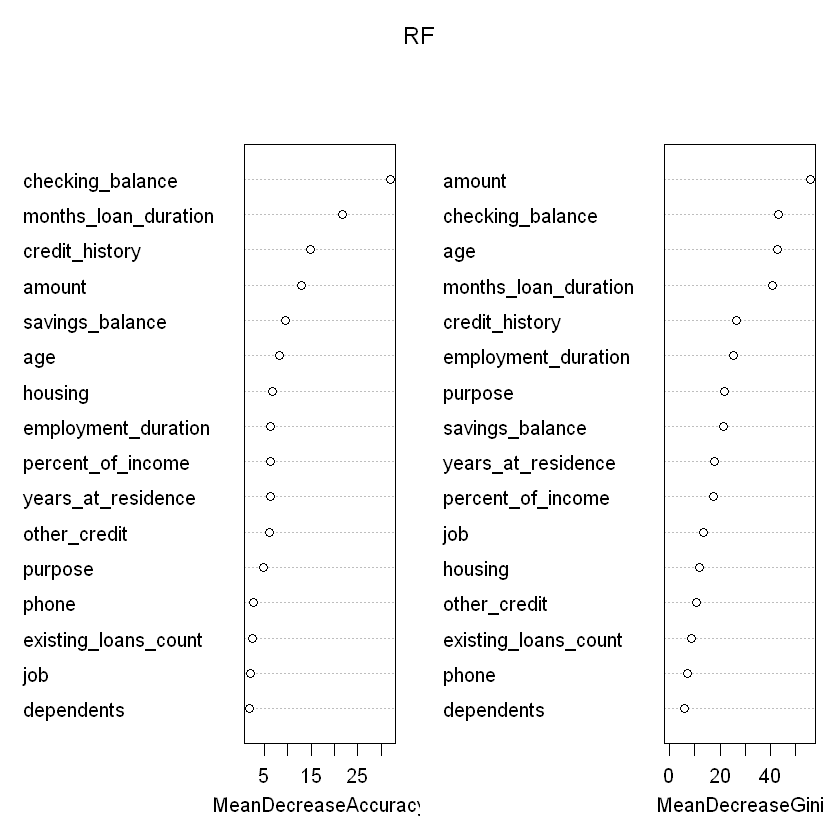

In [0]:
varImpPlot(RF)

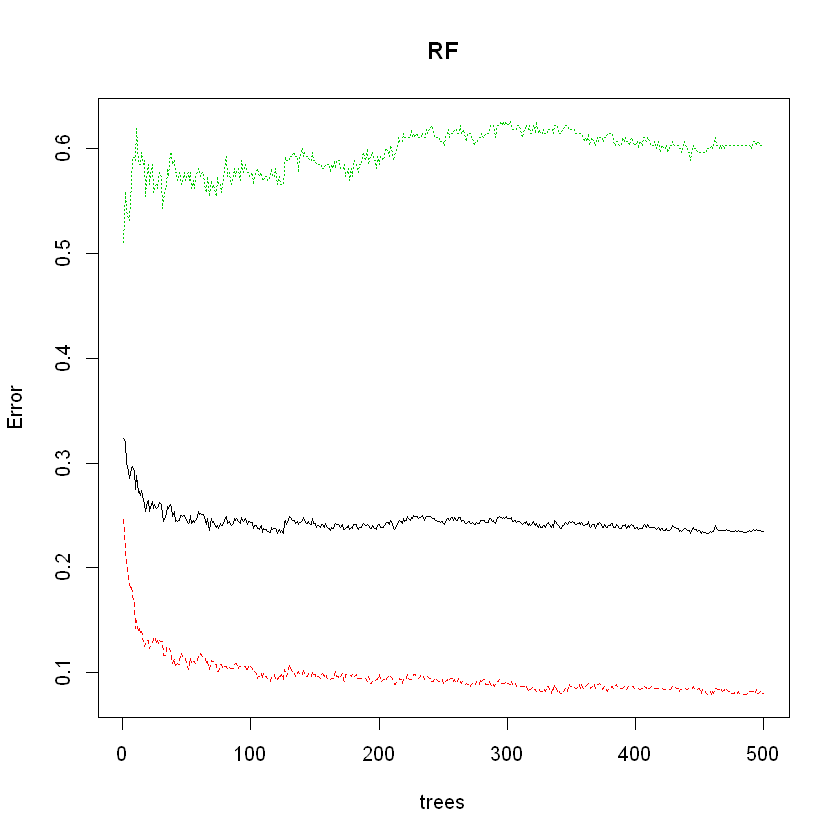

In [0]:
plot(RF)

 - The first plot indicates the error for different classes (colored) and out-of-bag (OOB) samples (black) over the amount of
   trees. Classes are in the same order as the results we get from print(model), so will be red=setosa and green=virginica. We
   essentially see that the error seems to be lowest around 500 trees.